In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Subplot demo
 - plt.subplot() is a bit like HTML table with plots in each cell
 - plt.subplot(rows, cols, selected) creates a grid for several plots and selects into which of them the following commands will draw.
 - when called again, it doesn't create a new grid, but instead selects another cell from the previously created grid
 - below is an example

Text(0.5,1,'$x^3$')

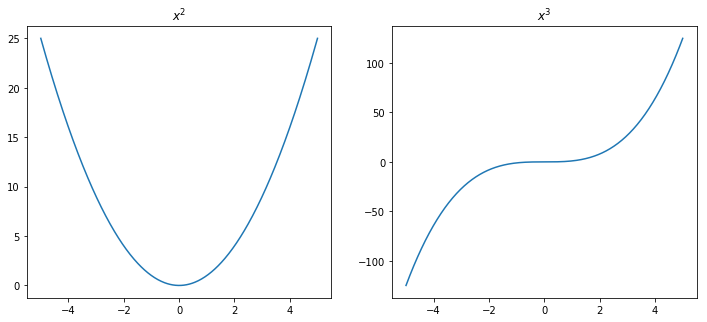

In [2]:
x = np.linspace(-5,5,500)

# Create a figure that is wider than usual
plt.figure(figsize=(12, 5))
# The nubers for figsize are in inches but on screen this is approximate

# This creates a subplot grid (or table) and selects the first cell
plt.subplot(1, 2, 1)
plt.plot(x, x**2)
plt.title('$x^2$') # The surrounding $ signs tell matplotlib to render the string as a math expression (LaTeX syntax)

# This selects the other cell in the subplot grid
plt.subplot(1, 2, 2)
plt.plot(x, x**3)
plt.title('$x^3$')

## Random numbers and histograms

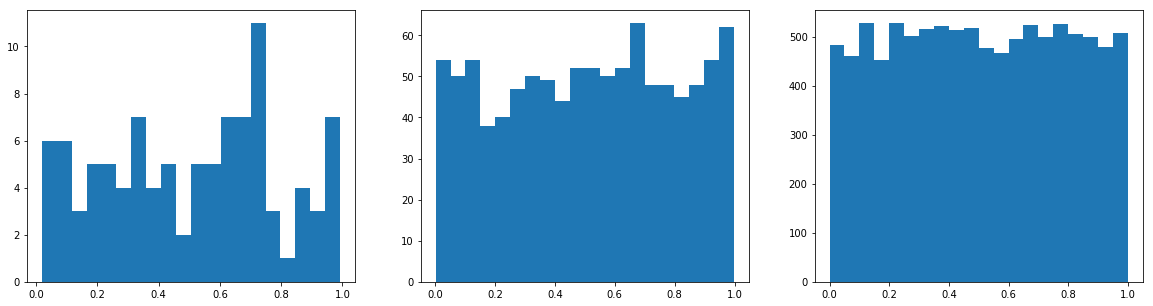

In [3]:
# Creates a wide figure
plt.figure(figsize=(20, 5))

# Now let's create 3 sub-plots
for i in range(3):
    # This creates subplots organized in 1 row and 3 columns and selects subplot i+1 (numbered from 1) as the active one.
    plt.subplot(1, 3, i+1)
    # N = 100, 1000, 10000
    N = 10**(i+2)
    # generate N random numbers
    X = np.random.rand(N, 1)
    # Plot a histogram of those numbers
    plt.hist(X, bins=20)
    
# Note how with more numbers the histograms approaches a nice looking uniform distribution between 0 and 1

In [4]:
np.random.rand(5, 5).mean(axis=1)

array([0.58324758, 0.342748  , 0.70100099, 0.42602057, 0.56220569])

#### Histograms of averages
Copy the code from the cell above and modify it in the following way:
- Instead of generating N ranomd numbers, generate an N by N array of random numbers
- Compute a new array where each number is the average of a row from the square array (use `X.mean(axis=1)`)
- Plot the histograms of the resulting N numbers


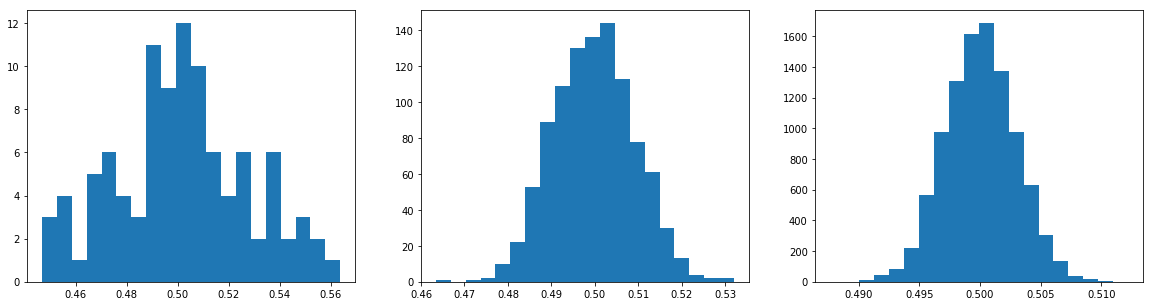

In [5]:
# Creates a wide figure
plt.figure(figsize=(20, 5))

# Now let's create 3 sub-plots
for i in range(3):
    # This creates subplots organized in 1 row and 3 columns and selects subplot i+1 (numbered from 1) as the active one.
    plt.subplot(1, 3, i+1)
    # N = 100, 1000, 10000
    N = 10**(i+2)
    # generate N random numbers
    X = np.random.rand(N, N)
    Y = X.mean(axis=1)
    # Plot a histogram of those numbers
    plt.hist(Y, bins=20)

Observe how the histograms look more and more like a bell curve with lrger N. This is an illustration of the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem). Here is a good [video about it](https://www.khanacademy.org/math/ap-statistics/sampling-distribution-ap/sampling-distribution-mean/v/central-limit-theorem) from Khan Academy (The theorem is not part of the course material, just using it here to practice with histograms and random numbers)

## Linear fit

#### The following cell generates simple synthetic data with linear relation and some noise. Run the cell several times and observe how the graph and the parameters of the line change. 

estimate_y = 2.895*x + 2.200


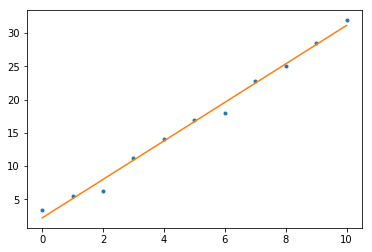

In [3]:
x = np.arange(11)
y = x * 3 + 2 + np.random.randn(len(x))
a, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, x*a + b)
print("estimate_y = %0.3f*x + %0.3f" % (a, b))

#### Use a loop to run the noisy data generation and the linear fit from the cell above 1000 times. Store the slope (a) and the intercept (b) from each run. Plot the histograms of the 1000 slopes and 1000 intercepts.

#### Compute the average slope and intercept and compare them to those used to generate tha noisy `y`

#### Make a plot with the following 5 lines:
 - Line accorind to the original equation used to generated the data (without the random noise)
 - 4 lines with all cominations of lowest and highst slope and lowest and highest intercept

Optionally play with colors and line styles or alpha transparency to make it look as informative as possible.
    

#### Repeat the loop above but with x=np.arange(0, 21, 2), observe how the histogram for slopes is narrower in this case
Note that x.size is in both cases 11

#### Side notes:
The random noise as used here is a fairly good model for limited accuracy of a real world measurement instrument, this exercise provides some intution for how the accuracy of individual measurements affects the accuracy of downstream numbers derived from the measurements using linear fit.

## Heatmaps and images

In [6]:
m = np.eye(10)*np.arange(10)
m

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 3., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 4., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 5., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 6., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 7., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 8., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 9.]])

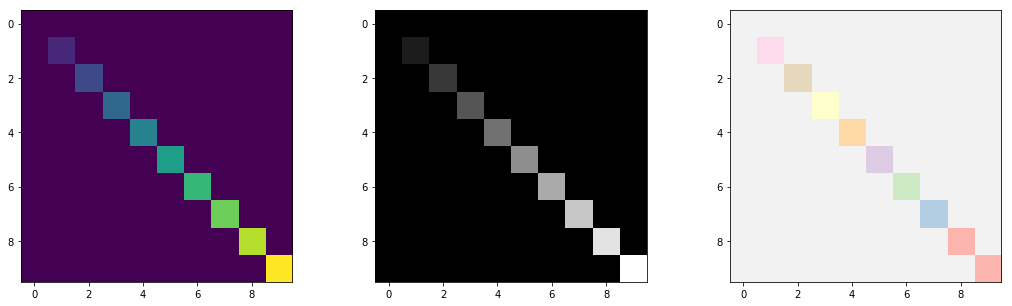

In [10]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.imshow(m)

plt.subplot(1, 3, 2)
plt.imshow(m, cmap=plt.cm.gray)  # cmap is short for colormap - how to convert values to colors

plt.subplot(1, 3, 3)
plt.imshow(m, cmap=plt.cm.Pastel1_r)

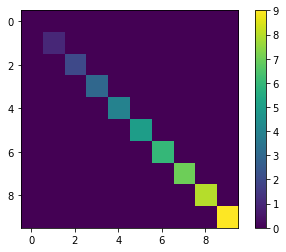

In [11]:
# You can add a colorbar which is like a legend for the colormap
plt.imshow(m)
plt.colorbar()

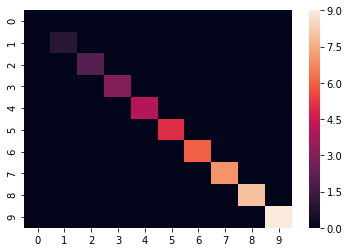

In [12]:
# Similar plot via Saborn
sns.heatmap(m)

In [13]:
# let's get a demo image from the scipy library
import scipy
face = scipy.misc.face()
# image files can be loaded using scipy.ndimage.imread()

In [16]:
face.shape

(768, 1024, 3)

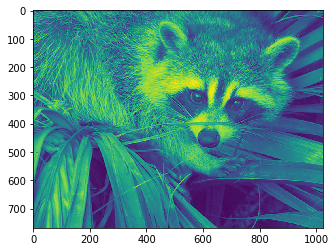

In [21]:
plt.imshow(face[:,:,0])

#### Explore what the `face` array is, how many dimensions does it have, what's the shape?

In [17]:
face.size

2359296

#### Plot only the red component of the image

#### Plot the 3 color components of the image separately using subpolot

#### Convert the image to grayscale using all 3 components (each pixel should be the average of the r, g and b components) and plot it

#### Plot a 16 by 16 black and white image with white lines on both diagonals (1 pixel wide) and black background

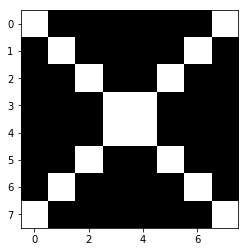

In [81]:
N = 16
plt.imshow( ??? , cmap='gray')

## Bonus - Conway's Game of Life
Take a look at the [basic animation example](https://matplotlib.org/examples/animation/basic_example.html) and implement [Conway's Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) using imshow().
 - Better done in a python file, not in Jupyter
 - Likely to take a couple of hours or more